In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from cascade_driver import CascadeDriver
cas_driver = CascadeDriver(zenith_angle = 30)

MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)
Tabulate cross-section for pi0(111)
Tabulate cross-section for K_L0(130)
Tabulate cross-section for pi-(-211)
Tabulate cross-section for pi+(211)
Tabulate cross-section for K_S0(310)
Tabulate cross-section for K-(-321)
Tabulate cross-section for K+(321)
Tabulate cross-section for D-(-411)
Tabulate cross-section for D+(411)
Tabulate cross-section for Dbar0(-421)
Tabulate cross-section for D0(421)
Tabulate cross-section for D_s-(-431)
Tabulate cross-section for D_s+(431)
Tabulate cross-section for nbar0(-2112)
Tabulate cross-section for n0(2112)
Tabulate cross-section for pbar-(-2212)
Tabulate cross-section for p+(2212)
Tabulate cross-section for Lambdabar0(-3122)
Tabulate cross-section for Lam

In [7]:
%autoreload 2

# mceq_decaying_pdgs = [111, -211, 211]

# mceq_decaying_pdgs = [-11, 11, -12, 12, -14, 14, 16, 22,
#                         111, 130, -211, 211, 310,
#                         -321, 321, -2112, 2112, 
#                         -2212, 2212, -3122, 3122]

mceq_decaying_pdgs = [111, 130, 310,
                        -321, 321, -2112, 2112, 
                        -2212, 2212, -3122, 3122]

# mceq_decaying_pdgs = [-11, 11, -12, 12,
#                       -13, 13, -14, 14, 16, 22,
#                         111, 130, -211, 211, 310,
#                         -321, 321, -2112, 2112, 
#                         -2212, 2212, -3122, 3122]


cas_driver.simulation_parameters(pdg = 2212, energy = 1e2, xdepth = 0,
                                 threshold_energy = 1e-6, stop_height = 5,
                                 accumulate_runs = True, reset_ids = True,
                                 mceq_decaying_pdgs = mceq_decaying_pdgs)

for i in range(100):
    cas_driver.run()

stop depth = 635.9540964571235
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 2 number of decays = 0
4 Number of inter = 3 number of decays = 0
5 Number of inter = 4 number of decays = 0
6 Number of inter = 4 number of decays = 7
1 Number of inter = 4 number of decays = 7
2 Number of inter = 5 number of decays = 7
3 Number of inter = 6 number of decays = 7
4 Number of inter = 6 number of decays = 10
1 Number of inter = 6 number of decays = 10
2 Number of inter = 7 number of decays = 10
3 Number of inter = 8 number of decays = 10
4 Number of inter = 9 number of decays = 10
5 Number of inter = 11 number of decays = 10
6 Number of inter = 11 number of decays = 17
1 Number of inter = 11 number of decays = 17
2 Number of inter = 12 number of decays = 17
3 Number of inter = 14 number of decays = 17
4 Number of inter = 15 number of decays = 17
5 Number of inter = 15 number of decays = 22
1 Number of inter = 15 number of decays = 22
2 

In [8]:
from cascade_analysis import CascadeAnalysis

cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()
cascade_analysis.search_for_parents()

Number of runs = 100
Initial state:
  $p$(2212) with energy = 1.000e+02

Final state:
  Number of all particles in cascade = 6947
  Number of final particles = 3117
  Number of interactions = 521
  Number of decays = 602
  Max number of generations = 7

  Max xdepth = 1193.284240741907
  Exectution time = 0.83 s
  Exectution time per run = 0.01 s
  Size of cascade_driver object = 6.91 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+02 GeV
  Energy in final particles = 1.80690e+02 GeV
  Relative loss(+)/gain(-) -8.069e-01
All final ids are unique, min = 0, max = 6946
{2112, 130, -2112}


In [ ]:
# cascade_analysis.check_particle_existence()

In [ ]:
cascade_analysis.plot_ptypes_dist(from_ = 1)

In [ ]:
cascade_analysis.plot_ptypes_energy_dist(from_ = 0)

In [ ]:
cascade_analysis.plot_energy()

In [ ]:
cascade_analysis.plot_energy_list(pids = [-13, 13, -14, 14, -11, 11, 2212, 2112])

In [45]:
%autoreload 2
from mceq_comparison import GetMCEQDist
import matplotlib.pylab as plt

res_mceq = GetMCEQDist()


{'disable_interactions_of_unstable': False, 'disable_charm_pprod': False, 'fix_dpmjet_neutral_kaons': True, 'allowed_projectiles': [], 'disabled_particles': [20, 19, 18, 17, 97, 98, 99, 101, 102, 103], 'disable_direct_leptons': False, 'disable_leading_mesons': False, 'exclude_from_mixing': [13], 'disable_decays': [-13, 13, -211, 211], 'force_resonance': [], 'no_mixing': False, 'forced_int_cs': None, 'replace_meson_cross_sections_with': None}
MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)
[54]


In [9]:

cascade_analysis.search_for_parents()

{321, 130, 3122, 310, -321}


Muon mass = 0.1056583745, 0.1056583745


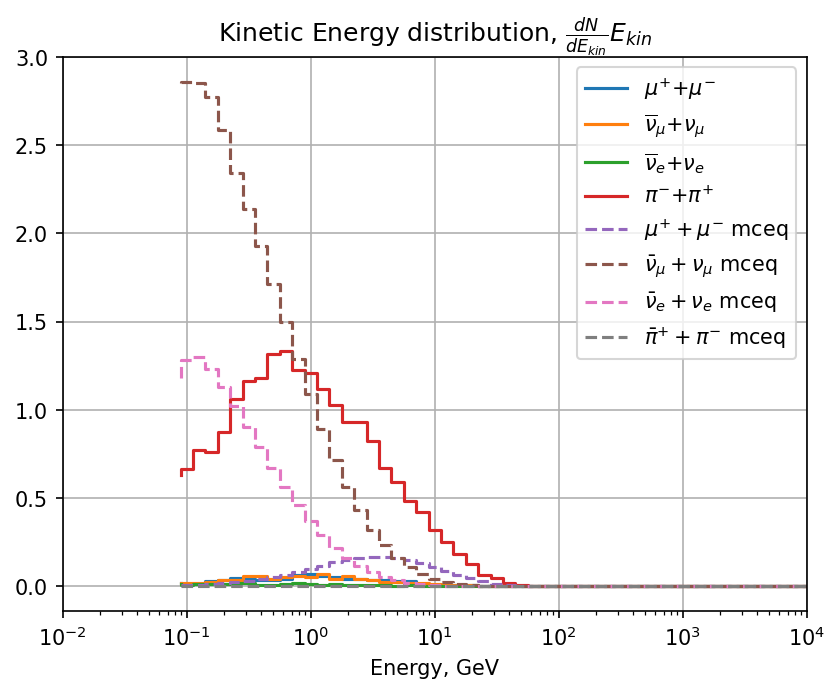

In [10]:
plt.rcParams["figure.dpi"] = 150
cascade_analysis.plot_energy_kin_dist(pids = [(-13, 13), (-14,14), (-12, 12), (-211, 211)], 
                                      per_run=True,
                                      xrange = (0.9e-1, 1e3),
                                      nbins=res_mceq.ebins,
                                      mceq_egrid = res_mceq.egrid)
plt.xscale("log")
# plt.yscale("log")
plt.step(res_mceq.mu_spec[0], res_mceq.mu_spec[1], label = res_mceq.mu_spec[2], linestyle='--')
plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
plt.step(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')
plt.step(res_mceq.pi_spec[0], res_mceq.pi_spec[1], label = res_mceq.pi_spec[2], linestyle='--')
# plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1] + res_mceq.nue_spec[1], label = "mceq neutrino tot", linestyle='--')

plt.xlim(1e-2, 1e4)
# plt.yscale("log")
# plt.ylim(1e-5, 10)
plt.grid()
# plt.grid(visible=True, which='minor', linestyle='--')
plt.legend()
# plt.ylim(1e-7, 1e3) 

Histogram of -211 with mass 0.13957039000000002
Histogram of 211 with mass 0.13957039000000002


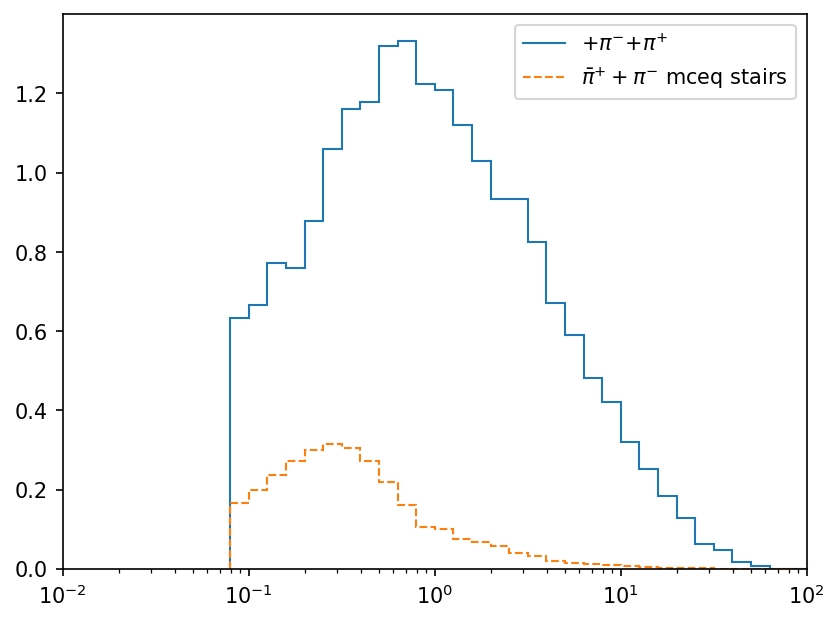

In [46]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = res_mceq.ebins)
plt.stairs(hist, bins, label = label, linestyle='-')
# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211,), bins = res_mceq.egrid)
# plt.stairs(hist, bins, label = label, linestyle='--')


plt.stairs(res_mceq.pi_spec[1], res_mceq.ebins, label = f"{res_mceq.pi_spec[2]} stairs", linestyle='--')
# plt.step(res_mceq.pi_spec[0], res_mceq.pi_spec[1], where='post', label = f"{res_mceq.pi_spec[2]} post", linestyle='--')
# plt.step(res_mceq.pi_spec[0], res_mceq.pi_spec[1], where='mid', label = res_mceq.pi_spec[2], linestyle='--')
# plt.step(res_mceq.pi_spec[0], res_mceq.pi_spec[1], where='pre', label = res_mceq.pi_spec[2], linestyle='--')

plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.legend()

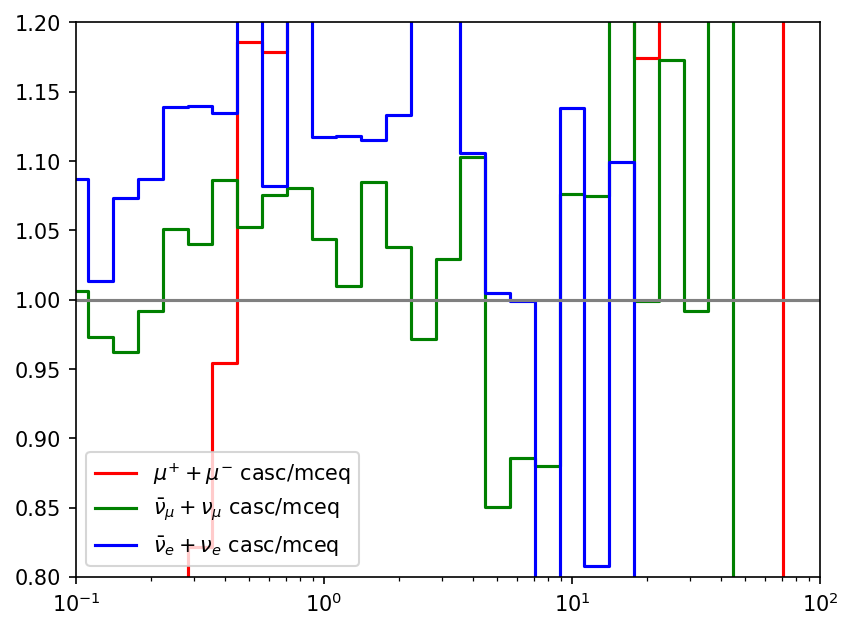

In [20]:
plt.xscale("log")
plt.xlim(1e-1, 1e2)
plt.ylim(0.8, 1.2)
plt.step(res_mceq.mu_spec[0], cascade_analysis.mu/res_mceq.mu_spec[1], 
         label = r"${\mu}^{+} + {\mu}^{-}$ casc/mceq", linestyle='-', color = 'red')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu/res_mceq.numu_spec[1], 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ casc/mceq", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue/res_mceq.nue_spec[1], 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ casc/mceq", linestyle='-', color = 'blue')
plt.step(res_mceq.mu_spec[0], res_mceq.nue_spec[1]/res_mceq.nue_spec[1], color = 'grey')
plt.legend()

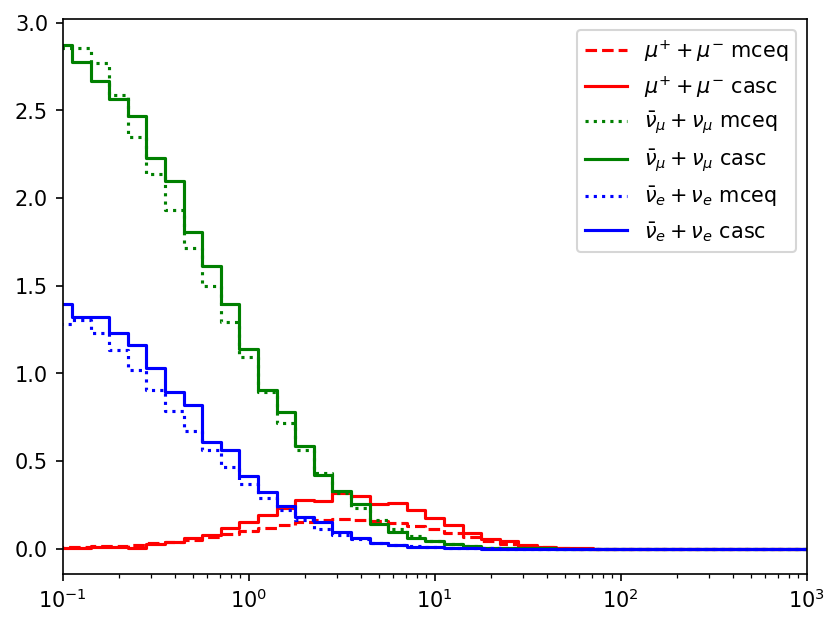

In [30]:
plt.xscale("log")
# plt.yscale("log")
plt.step(res_mceq.mu_spec[0], res_mceq.mu_spec[1], 
         label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--', color = 'red')
plt.step(res_mceq.mu_spec[0], cascade_analysis.mu, 
         label = r"${\mu}^{+} + {\mu}^{-}$ casc", linestyle='-', color = 'red')
plt.step(res_mceq.mu_spec[0], res_mceq.numu_spec[1], 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ mceq", linestyle=':', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ casc", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], res_mceq.nue_spec[1], 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ mceq", linestyle=':', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ casc", linestyle='-', color = 'blue')
# plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
# plt.step(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')
plt.xlim(1e-1, 1e3)
# plt.ylim(0, 0.5)
plt.legend()

In [ ]:
plt.xscale("log")
plt.yscale("log")
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu_from_mu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ from muons", linestyle='--', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu_from_other, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ from other", linestyle=':', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ total", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue_from_mu, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ from muons", linestyle='--', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue_from_other, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ from other", linestyle=':', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ total", linestyle='-', color = 'blue')
# plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
# plt.step(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')
plt.xlim(1e-1, 1e3)
plt.legend()

In [22]:
from fluka_comparison.fluka_muon_data import fluka_en_dist

[1.  1.3 2.  2.5 4.  5. ] [0.169 0.403 0.283 0.603 0.301]


(0.0, 2.0)

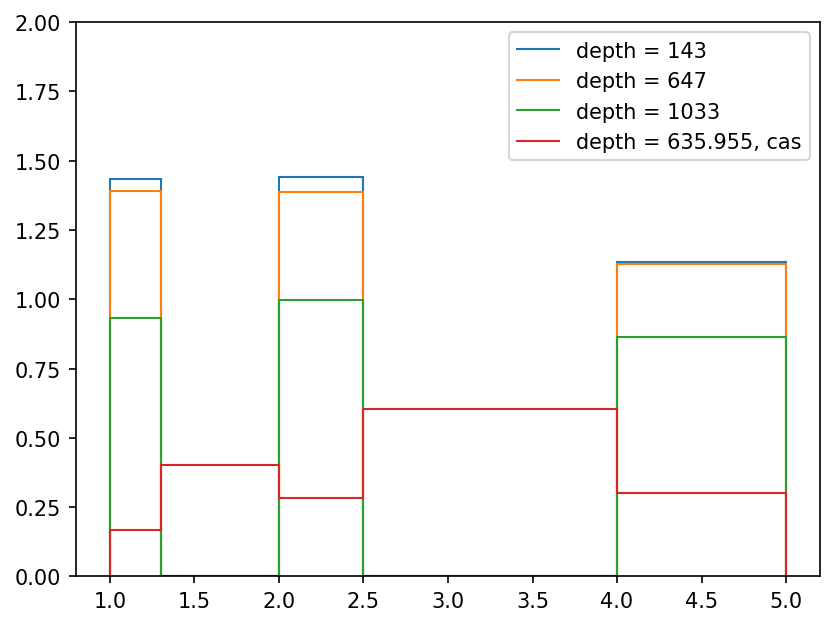

In [29]:
for name, value in fluka_en_dist().items():
    # plt.steps(value[0], value[1])
    plt.stairs(value[1], value[0], label = f"depth = {name}")
    en_bins = value[0]

gr, cnt = np.histogram(cascade_analysis.raw_muon_data[0], bins=en_bins)
gr = gr/cascade_analysis.raw_muon_data[1] 
print(cnt, gr)
plt.stairs(gr, cnt, label = "depth = 635.955, cas")
plt.legend()
plt.ylim(0, 2) 

# gr1, cnt = np.histogram(self.neutrinos_from_muons[muon_neut].energy, bins = nbins, range = xrange)
#         gr1 = gr1/runs_number
#         plt.step(mceq_egrid, gr1, lab

In [ ]:
cascade_analysis.plot_xdepth_list(nbins = 100, pids = [-14, 14, 2212, -13, 13], 
                                  xrange = (0, 1012), per_run = True)

In [ ]:
cascade_analysis.plot_xdepth_stop(nbins = 100, pids = [-14, 14, 2212, -13, 13, 22], #pids = None, 
                                  all_pids = True, 
                                  xrange = (0, 1168), per_run = False)

In [ ]:
cascade_analysis.plot_height_list(pids = [22, -13, 13, -11, 11], all_pids=True)

In [ ]:
cascade_analysis.digitize()

In [ ]:
import matplotlib.pylab as plt
plt.semilogx(cascade_analysis.egrid, cascade_analysis.hist_dict[22][0][99])



len(cascade_analysis.hist_dict[22][0])